# Importing Lib and Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Reading and Understanding the Data


In [2]:
lead_df = pd.read_csv("Leads.csv")
lead_df.head() # Checking First 5 Rows

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning
### We can see some values are given as Select which indicated the values are missing

In [6]:
# Changing Select Values to Nan
lead_df = lead_df.replace('Select', np.nan)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Check and drop values with single unique numbers.
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Let us Drop unique valued columns as they wont make much difference
lead_df= lead_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [9]:
# Checking for duplicates and dropping the entire duplicate row if any
lead_dup = lead_df.copy()

lead_dup.drop_duplicates(subset=None, inplace=True)
lead_dup.shape

(9240, 32)

In [10]:
# Checking whether if there is any missing value in percentage.
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

In [11]:
# Droping columns which containd more than 40% of Missing Values
cols=lead_df.columns[round((lead_df.isnull().sum()/len(lead_df))*100)>40]
lead_df=lead_df.drop(cols,1)
lead_df.shape

(9240, 25)

In [12]:
#Percentage of missing values graeter than 0 after dropping the columns with high missing values.
lead_per = 100 * lead_df.isnull().sum()/len(lead_df)
lead_per = lead_per[lead_per > 0]
lead_per

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.707792
dtype: float64

### Handing the missing data
#### City

In [13]:
lead_df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [14]:
# Since City is catagorical Value using Mode to assign Values
lead_df["City"] = lead_df["City"].fillna(lead_df["City"].mode()[0])
lead_df["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Tags

In [15]:
lead_df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [16]:
# Since Tags is catagorical Value using Mode to assign Values
lead_df["Tags"] = lead_df["Tags"].fillna(lead_df["Tags"].mode()[0])
lead_df["Tags"].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [17]:
# Dropping tags as it is assigned by th leads
lead_df = lead_df.drop(["Tags"], axis = 1)

#### What matters most to you in choosing a course

In [18]:
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
# Since What matters most to you in choosing a course is catagorical Value using Mode to assign Values
lead_df["What matters most to you in choosing a course"] = lead_df["What matters most to you in choosing a course"].fillna(lead_df["What matters most to you in choosing a course"].mode()[0])
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### Dropping this coloum as it value changes alot

In [20]:
lead_df = lead_df.drop(["What matters most to you in choosing a course"], axis = 1)

#### What is your current occupation

In [21]:
lead_df["What is your current occupation"].value_counts()


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# Assiging UnKnown as its common occurance in What is your current occupation Column
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'UnKnown')
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
UnKnown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Specialization

In [23]:
lead_df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

##### from Data dictionary we can understand that the customer has not selected the value due to difffernt curcumstances Hence we are giving value unknown

In [24]:
lead_df["Specialization"] = lead_df["Specialization"].fillna("UnKnown")
lead_df["Specialization"].value_counts()

UnKnown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### Country

In [25]:
lead_df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [26]:
# Since Country is catagorical Value using Mode to assign Values
lead_df["Country"] = lead_df["Country"].fillna(lead_df["Country"].mode()[0])
lead_df["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [27]:
# Droping Country as the value count changes drastically
lead_df = lead_df.drop(["Country"], axis = 1)

#### Last Activity

In [28]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [29]:
# Assiging "Email Opened" as its common occurance in Last Activity Column
lead_df['Last Activity']=lead_df['Last Activity'].fillna('Email Opened')
lead_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Lead Source

In [30]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [31]:
# Assiging  "Google" as its common occurance in Lead Source Column
lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan,'Google')
# Since google and Google are same change the values to Google
lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [32]:
#Dropping Rows for Page Views Per Visit and TotalVisits as it wont make much differnce
lead_df.dropna(inplace = True)

In [33]:
lead_df.shape

(9103, 22)

In [34]:
# Checking whether if there is any missing value in percentage.
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2).sort_values(ascending = False)

Prospect ID                               0.0
Lead Number                               0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Last Notable Activity             

columns that indicates whether the customer had seen the ad in any of the listed items-
Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations

In [35]:
# Counts of unique values in Search.
lead_df["Search"].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [36]:
# Counts of unique values in Newspaper Article.
lead_df["Newspaper Article"].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [37]:
# Counts of unique values in X Education Forums.
lead_df["X Education Forums"].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [38]:
# Counts of unique values in Newspaper.
lead_df["Newspaper"].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [39]:
# Counts of unique values in Digital Advertisement.
lead_df["Digital Advertisement"].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [40]:
# Counts of unique values in Through Recommendations.
lead_df["Through Recommendations"].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

Most of the values for the above columns are no so they wont give any useful input for the testing So dropping these columns

In [41]:
lead_df= lead_df.drop(['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' ],axis=1)

## Detection and handiling of Outliers


In [42]:
lead_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
90%,650254.000000,1.000000,7.000000,1372.000000,5.000000
95%,655337.900000,1.000000,10.000000,1556.900000,6.000000
99%,659561.860000,1.000000,17.000000,1838.960000,9.000000


In [43]:
Col_outliers= ["Lead Number","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]


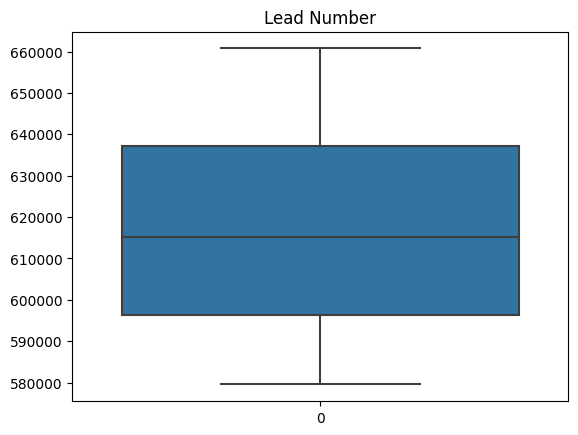

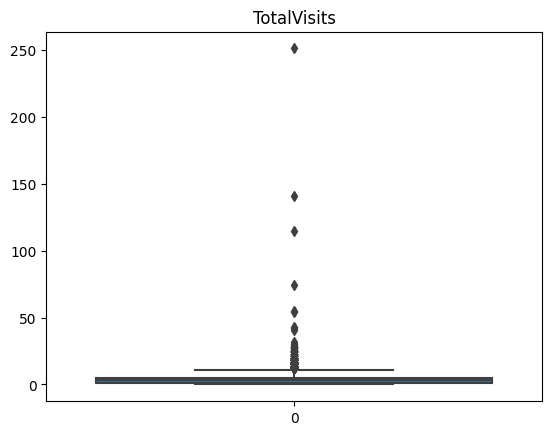

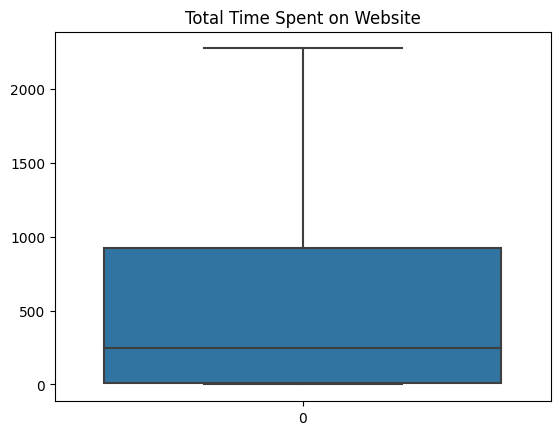

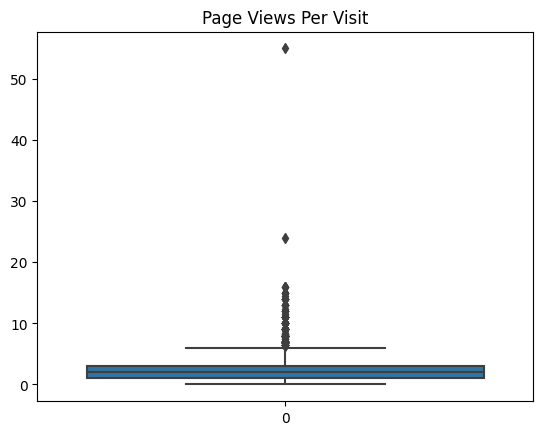

In [44]:
# Plotting Graphs
for i in Col_outliers:
    sns.boxplot(lead_df[i])
    plt.title(i)
    plt.show()

In [45]:
# Removing outliers above 95% limit
lead_df = lead_df[lead_df['TotalVisits'] <= 10]
lead_df = lead_df[lead_df['Page Views Per Visit'] <= 6]

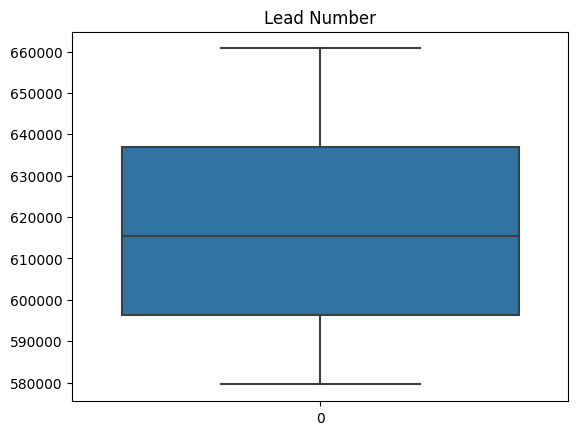

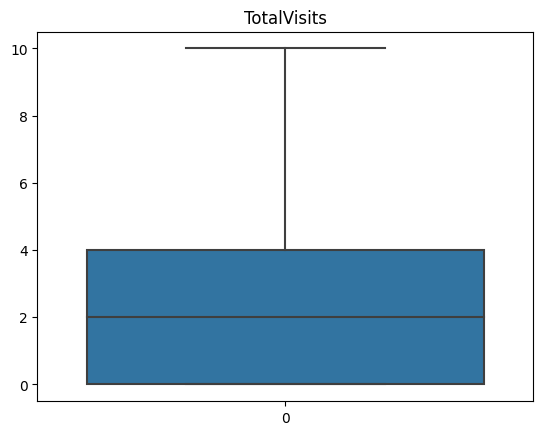

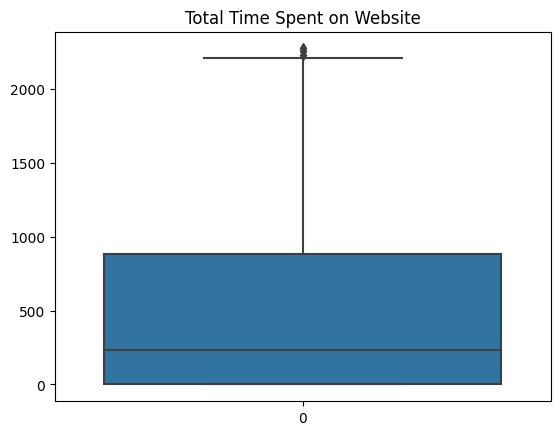

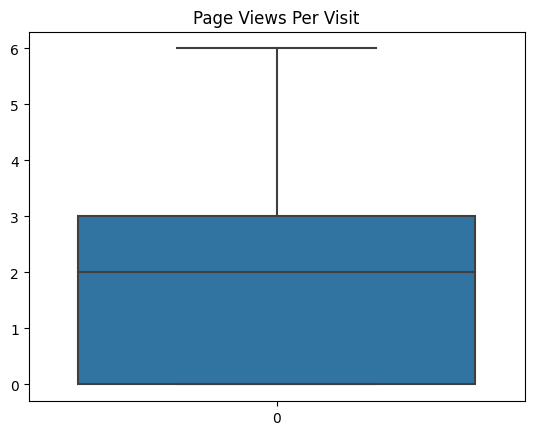

In [46]:
# Replotting the graph
for i in Col_outliers:
    sns.boxplot(lead_df[i])
    plt.title(i)
    plt.show()

In [47]:
# The outliers are removed
# Remaning Data frame
lead_df.shape

(8474, 16)

# EDA
## Univariate Analysis
### Catagorical Variable


In [48]:
#Calculating number of lead convertions.
lead_df["Converted"].value_counts()

0    5283
1    3191
Name: Converted, dtype: int64

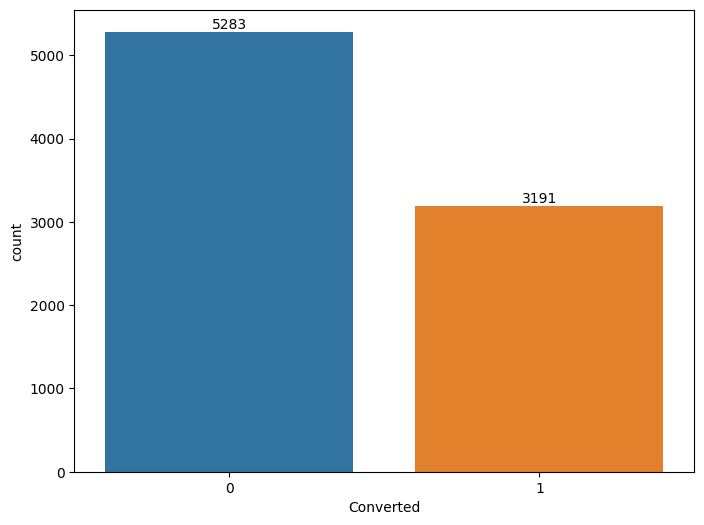

In [49]:
#Ploting graph
plt.figure(figsize = (8,6))
ax = sns.countplot(x=lead_df["Converted"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [50]:
# Counts of unique values in Lead Origin.
lead_df["Lead Origin"].value_counts()

Landing Page Submission    4408
API                        3433
Lead Add Form               603
Lead Import                  30
Name: Lead Origin, dtype: int64

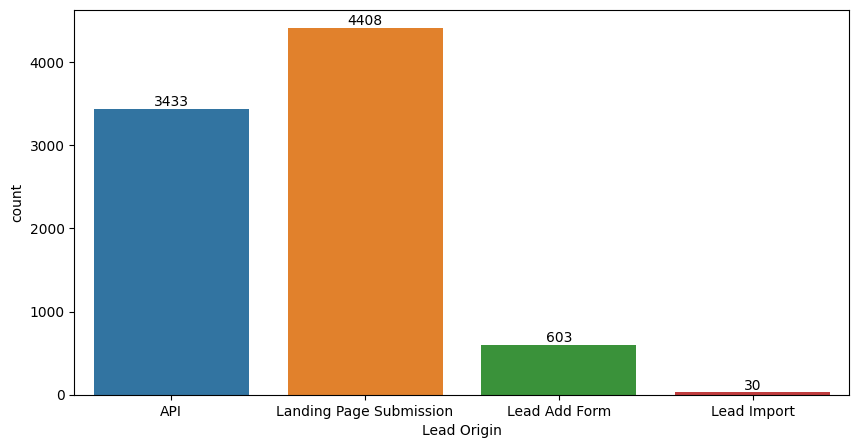

In [51]:
# Ploting  graph
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Lead Origin"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

leading Page submission is main for Lead Orgin


In [52]:
# Counts of unique values in Lead Source.
lead_df["Lead Source"].value_counts()

Google               2743
Direct Traffic       2349
Olark Chat           1742
Organic Search        919
Reference             440
Welingak Website      128
Referral Sites        102
Facebook               30
bing                    6
Click2call              3
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

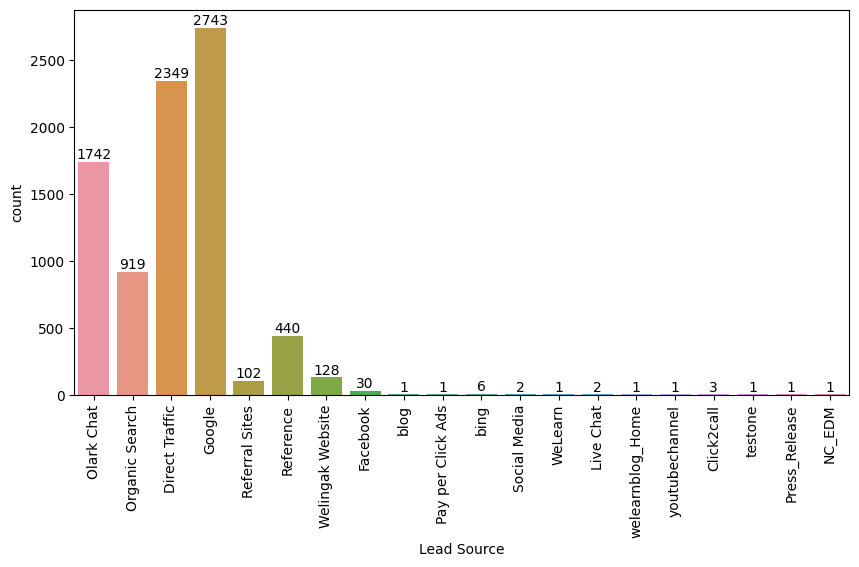

In [53]:
# Ploting graph:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Lead Source"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

The Main Lead sources are Google and Direct Traffic

In [54]:
# Counts of unique values in Do Not Email.
lead_df["Do Not Email"].value_counts()

No     7816
Yes     658
Name: Do Not Email, dtype: int64

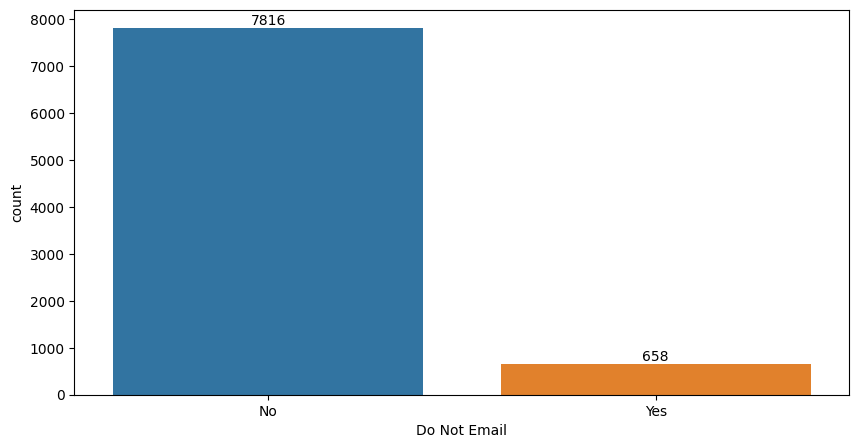

In [55]:
# Ploting graph of  Do Not Email.:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Do Not Email"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [56]:
# Counts of unique values in Do Not Call.
lead_df["Do Not Call"].value_counts()

No     8472
Yes       2
Name: Do Not Call, dtype: int64

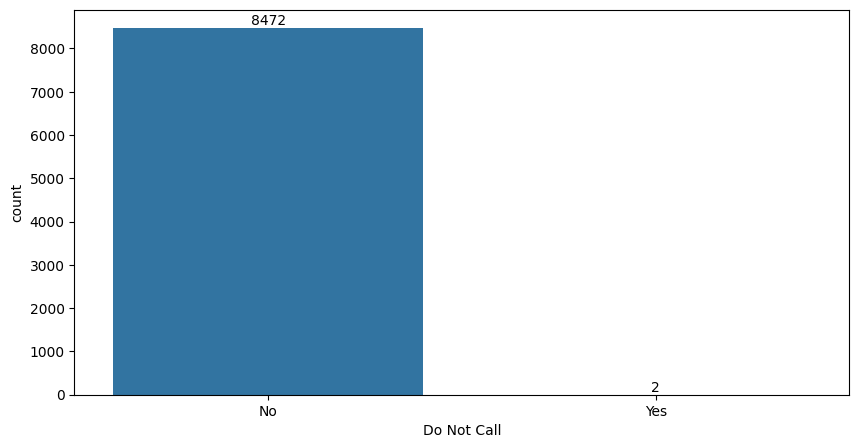

In [57]:
# Ploting graph of Do Not Call:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Do Not Call"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [58]:
# Counts of unique values in Last Activity.
lead_df["Last Activity"].value_counts()

Email Opened                    3189
SMS Sent                        2559
Olark Chat Conversation          944
Page Visited on Website          513
Converted to Lead                425
Email Bounced                    302
Email Link Clicked               254
Form Submitted on Website        110
Unreachable                       84
Unsubscribed                      59
Had a Phone Conversation          20
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

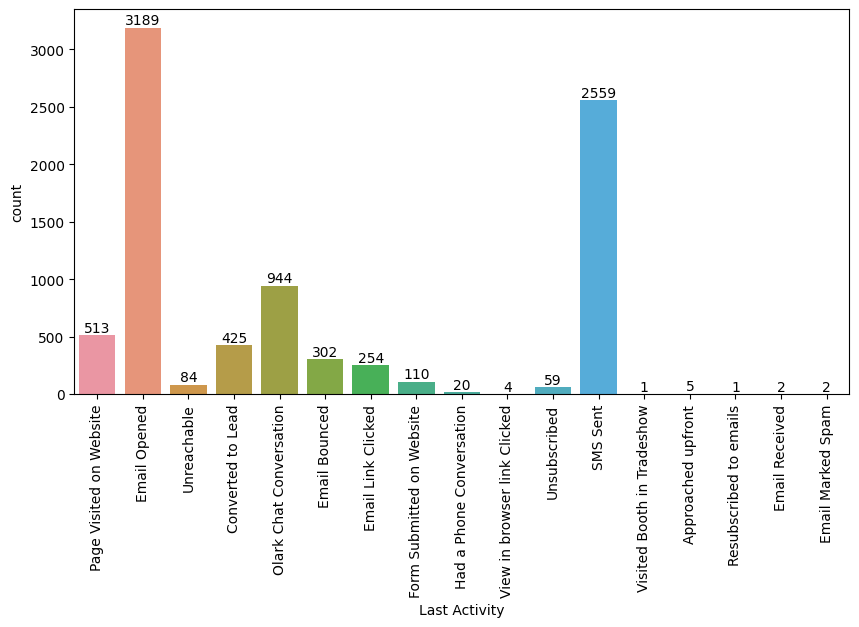

In [59]:
# Ploting graph of Last Activity:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Last Activity"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

The Number of values is High in Email Opened and SMS Sent in Last Activity

In [60]:
# Counts of unique values in Specialization.
lead_df["Specialization"].value_counts()

UnKnown                              3208
Finance Management                    893
Marketing Management                  769
Human Resource Management             763
Operations Management                 472
Business Administration               363
IT Projects Management                337
Supply Chain Management               310
Banking, Investment And Insurance     289
Media and Advertising                 179
Travel and Tourism                    165
International Business                162
Healthcare Management                 134
Hospitality Management                101
E-COMMERCE                             97
Retail Management                      86
Rural and Agribusiness                 60
E-Business                             51
Services Excellence                    35
Name: Specialization, dtype: int64

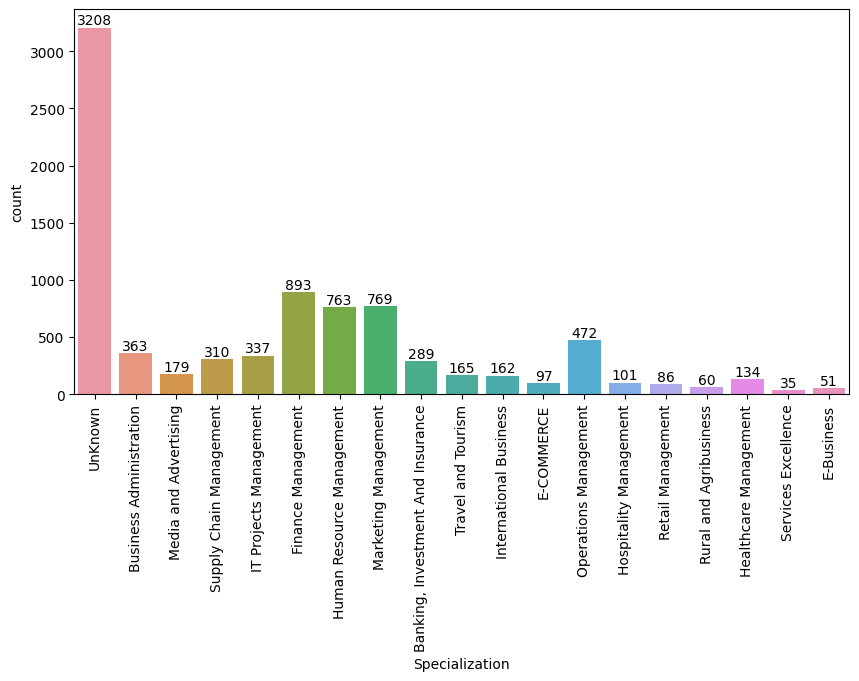

In [61]:
# Ploting graph of Specialization:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Specialization"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

 Management roles has higher lead in Specilization and most of the roles are not specified


In [62]:
# Counts of unique values in What is your current occupation.
lead_df["What is your current occupation"].value_counts()

Unemployed              5082
UnKnown                 2536
Working Professional     632
Student                  198
Other                     12
Housewife                  9
Businessman                5
Name: What is your current occupation, dtype: int64

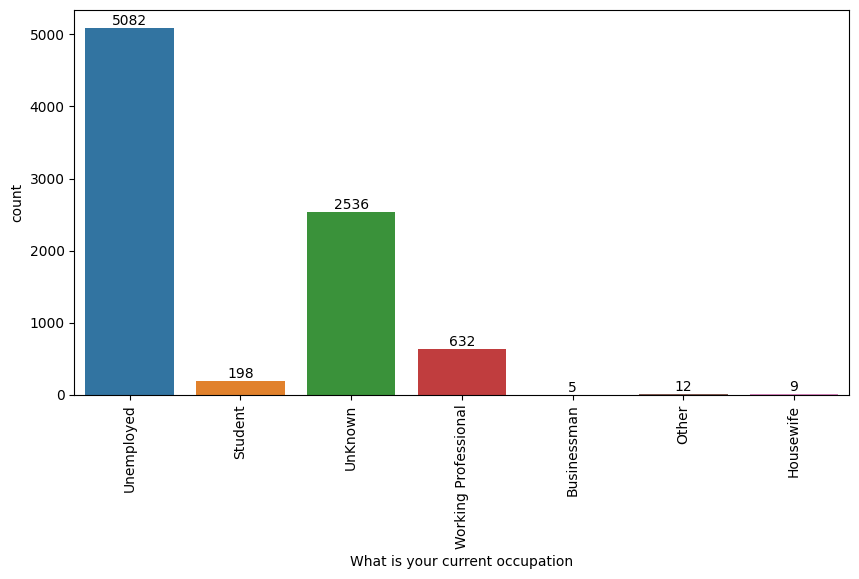

In [63]:
# Ploting graph of What is your current occupation:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["What is your current occupation"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

Most of the people are Unemployed

In [64]:
# Counts of unique values in City.
lead_df["City"].value_counts()

Mumbai                         6374
Thane & Outskirts               670
Other Cities                    612
Other Cities of Maharashtra     410
Other Metro Cities              341
Tier II Cities                   67
Name: City, dtype: int64

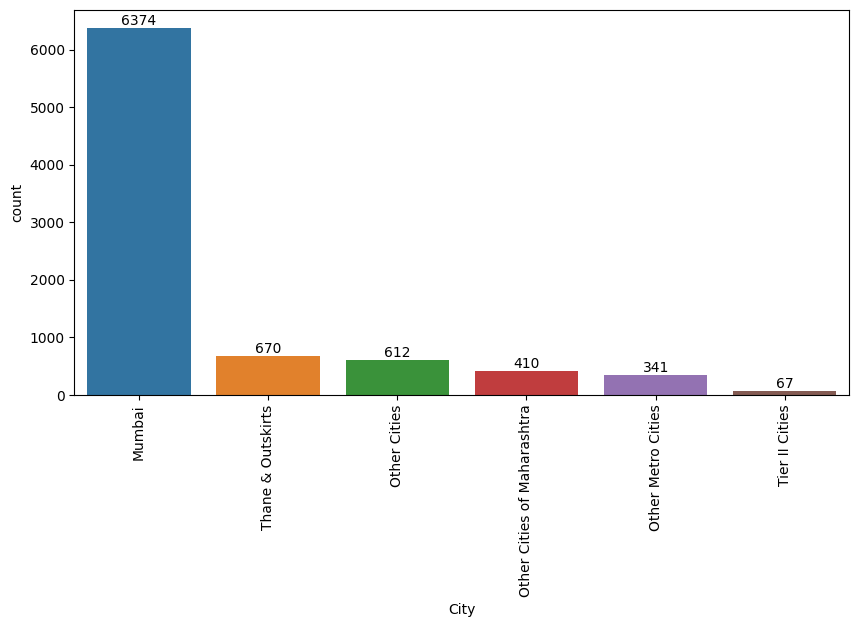

In [65]:
# Ploting graph of City:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["City"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

Majority of the people are residents of mumbai

In [66]:
# Counts of unique values of  free copy of 'Mastering the Interview' or not.
lead_df["A free copy of Mastering The Interview"].value_counts()

No     5939
Yes    2535
Name: A free copy of Mastering The Interview, dtype: int64

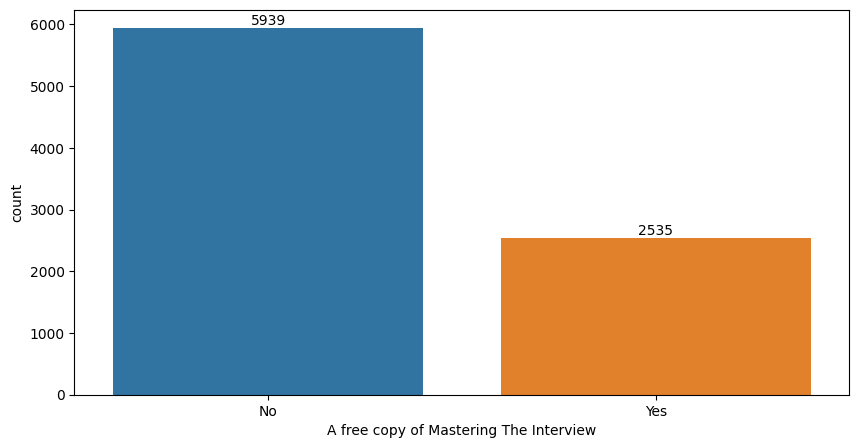

In [67]:
# Ploting graph of customer who wants a free copy of 'Mastering the Interview' or not:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["A free copy of Mastering The Interview"])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [68]:
# Counts of unique values in Last Notable Activity.
lead_df["Last Notable Activity"].value_counts()

Modified                        3111
Email Opened                    2612
SMS Sent                        2029
Page Visited on Website          238
Olark Chat Conversation          173
Email Link Clicked               160
Email Bounced                     59
Unsubscribed                      45
Unreachable                       30
Had a Phone Conversation          10
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

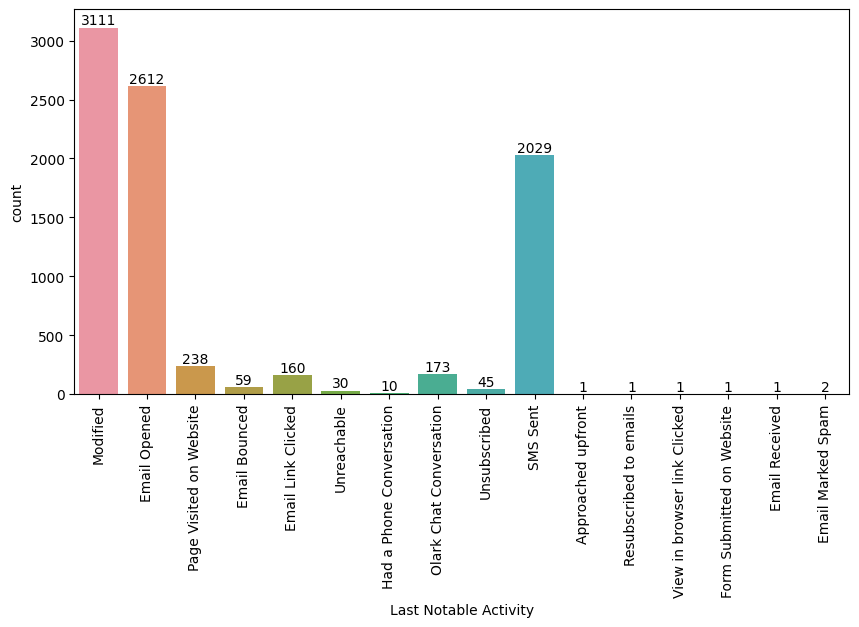

In [69]:
# Ploting total count of Last Notable Activity:
plt.figure(figsize = (10,5))
ax = sns.countplot(x=lead_df["Last Notable Activity"])
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

The Number of values is High in Email Opened and SMS Sent in Last Activity

## Bivariate Analysis
ploting in same order as univariate analysis with respect to lead Status

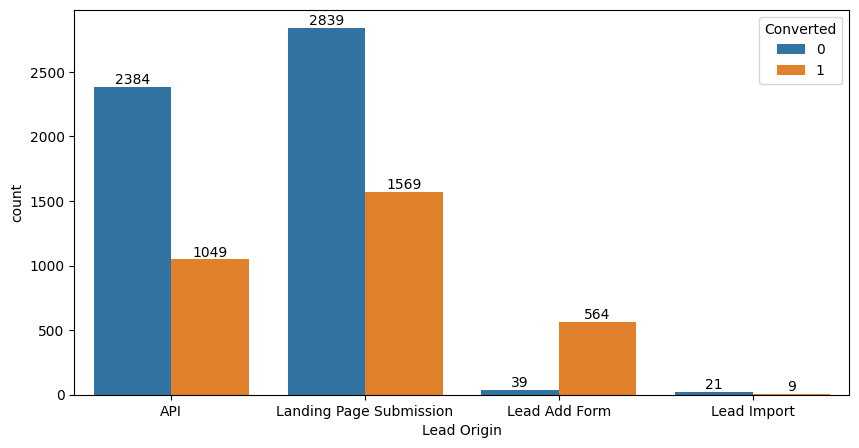

In [70]:
# Ploting graph of lead Origin W.R.T Lead Status.
plt.figure(figsize = (10,5))
ax = sns.countplot(data = lead_df, x=lead_df["Lead Origin"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

-Added form is more effective way to convert people but it is significantly less in count.


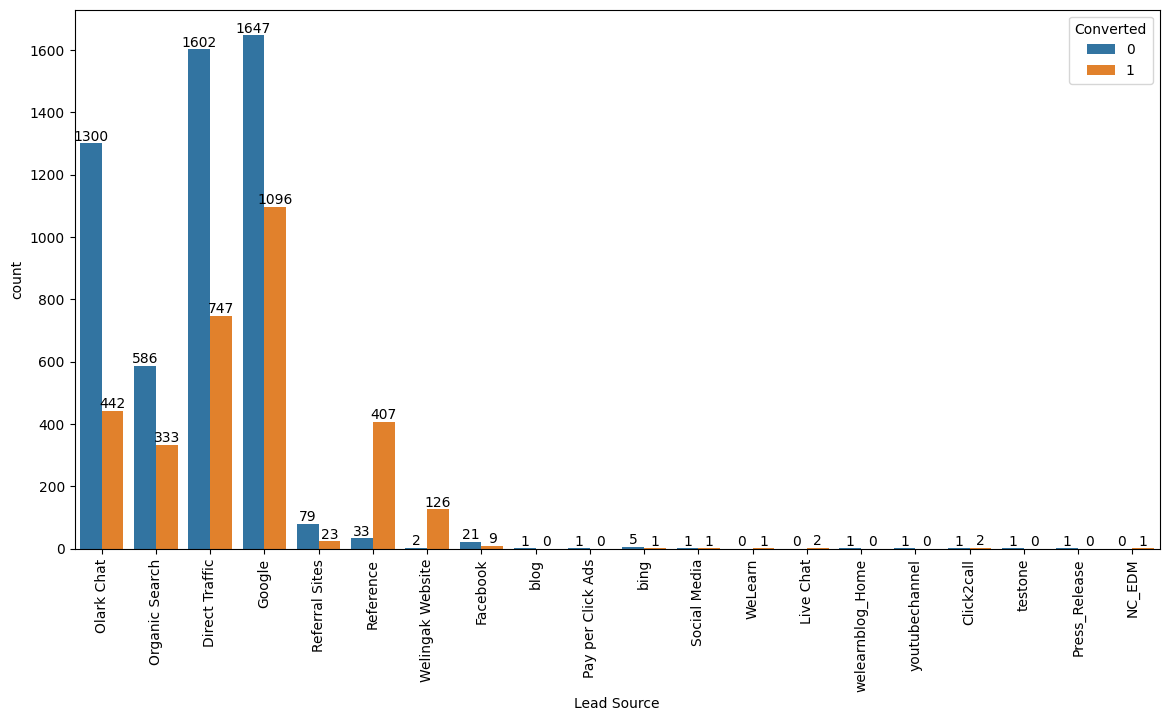

In [71]:
# Ploting graph of  lead source W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Lead Source"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

Reference helps most in converting people followed by Google.

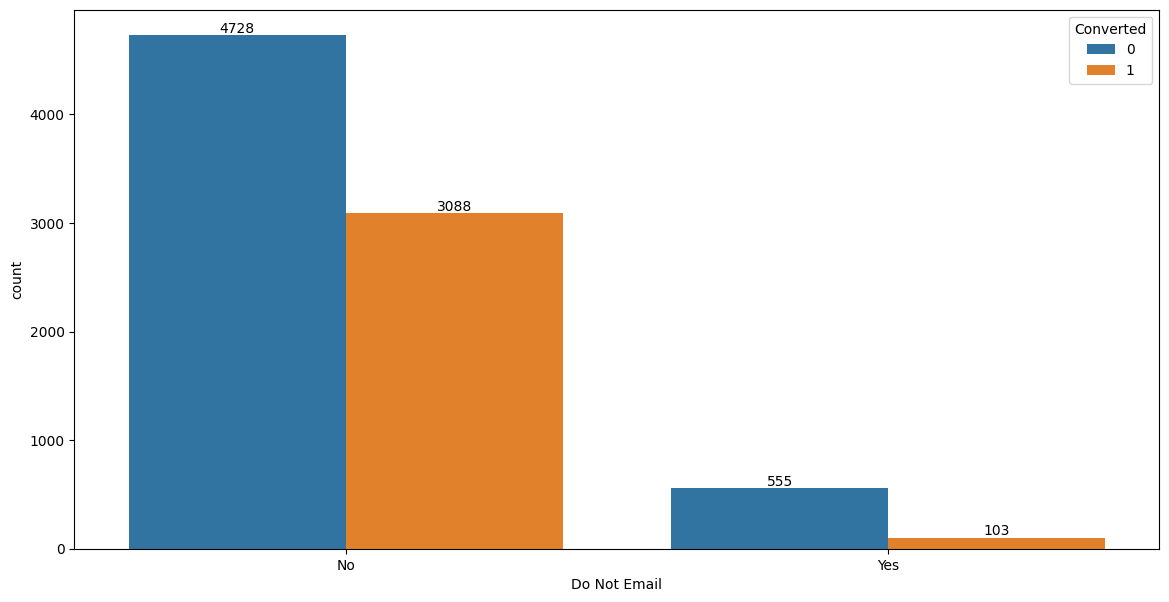

In [72]:
# Ploting graph of  Do Not Email W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Do Not Email"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

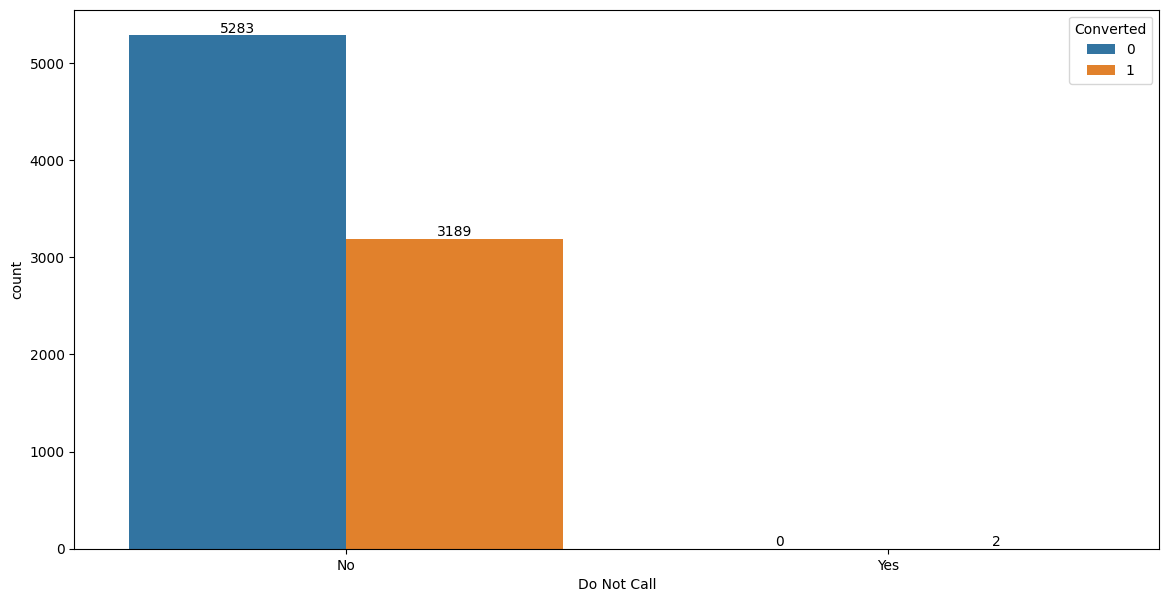

In [73]:
# Ploting graph of  Do Not Call W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Do Not Call"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

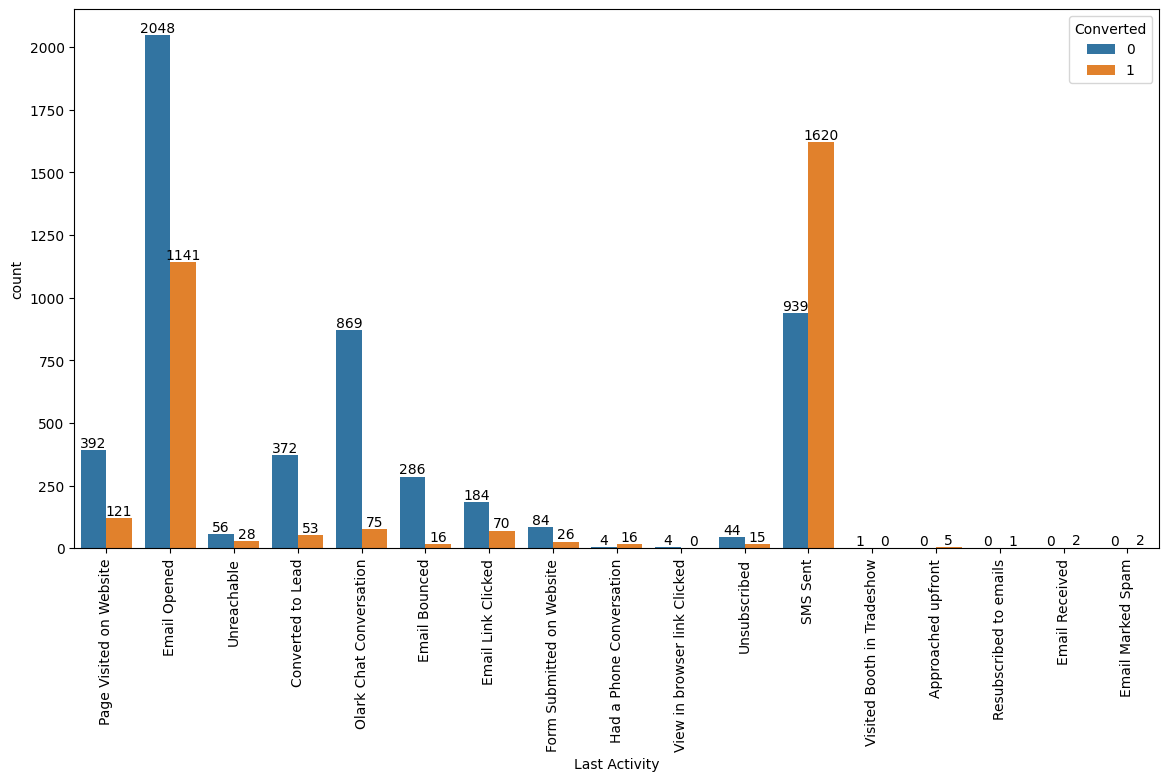

In [74]:
# Ploting graph of Last Activity W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Last Activity"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

SMS sent has the highest conversion rate even though it is Second in lead count.

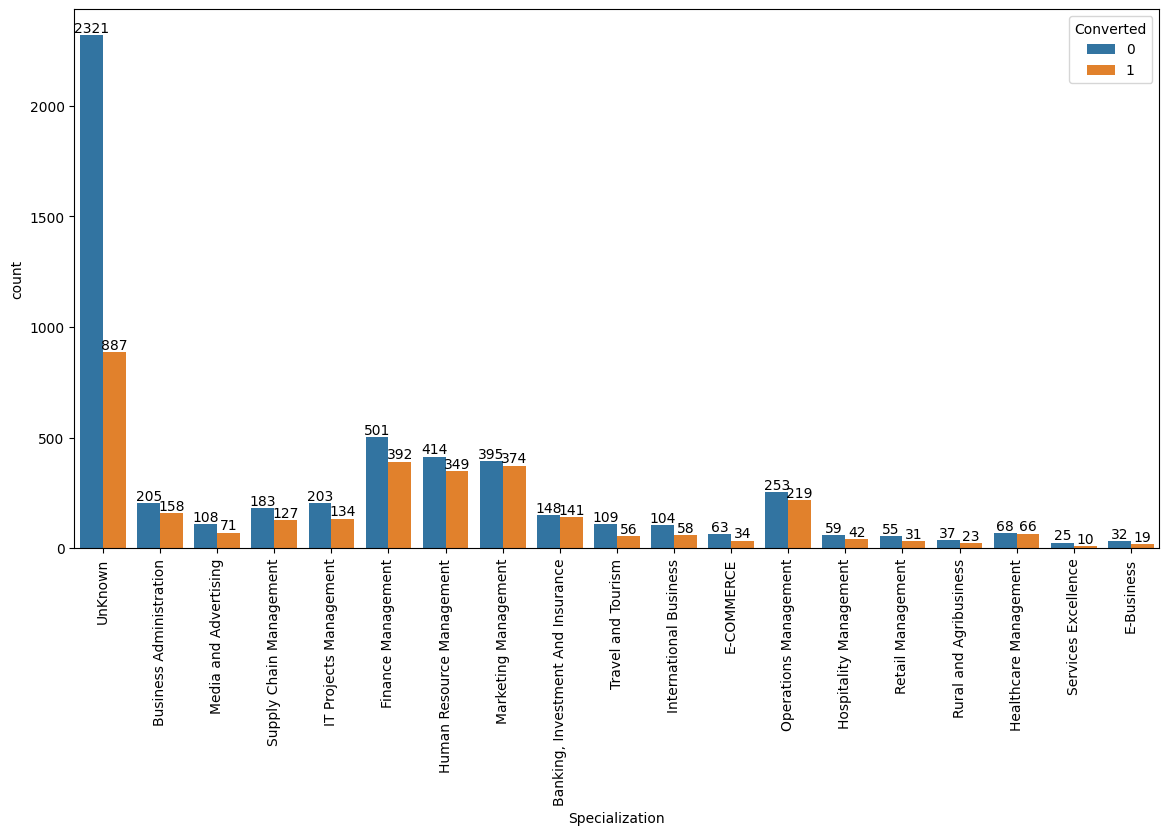

In [75]:
# Ploting graph of Specialization W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Specialization"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

Management roles has higher conversion rates.

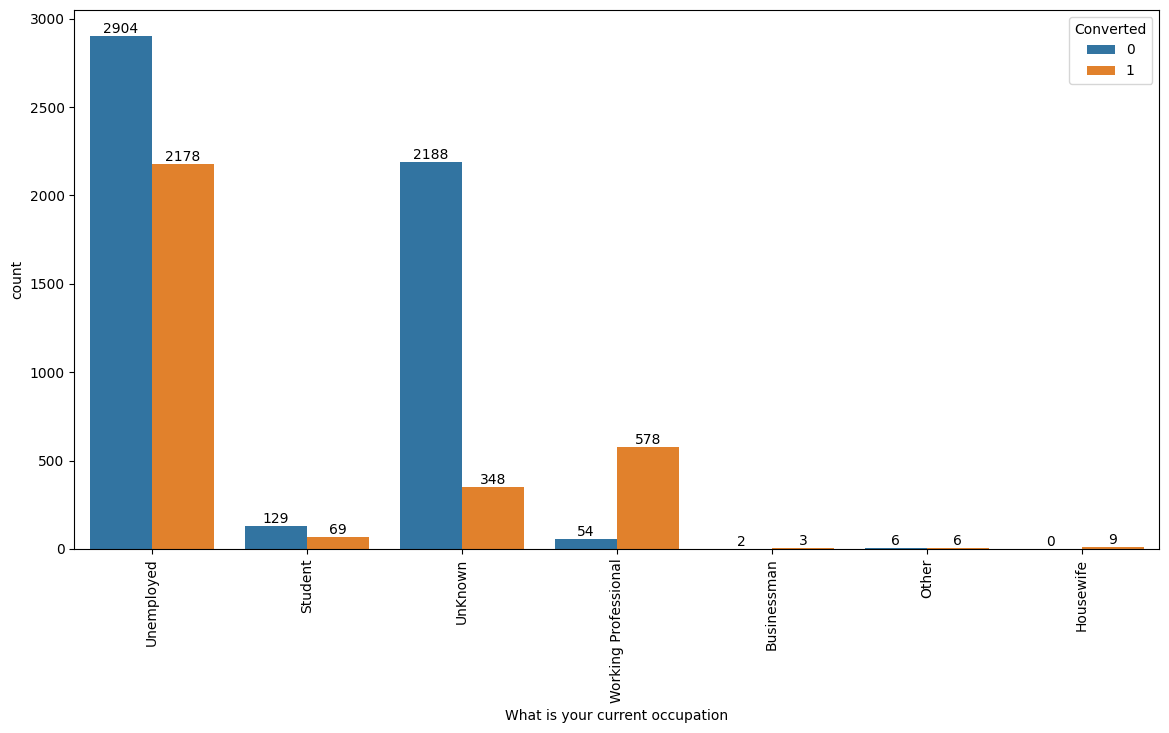

In [76]:
# Ploting graph of What is your current occupation W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["What is your current occupation"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

Working Professional has the highest conversion rate

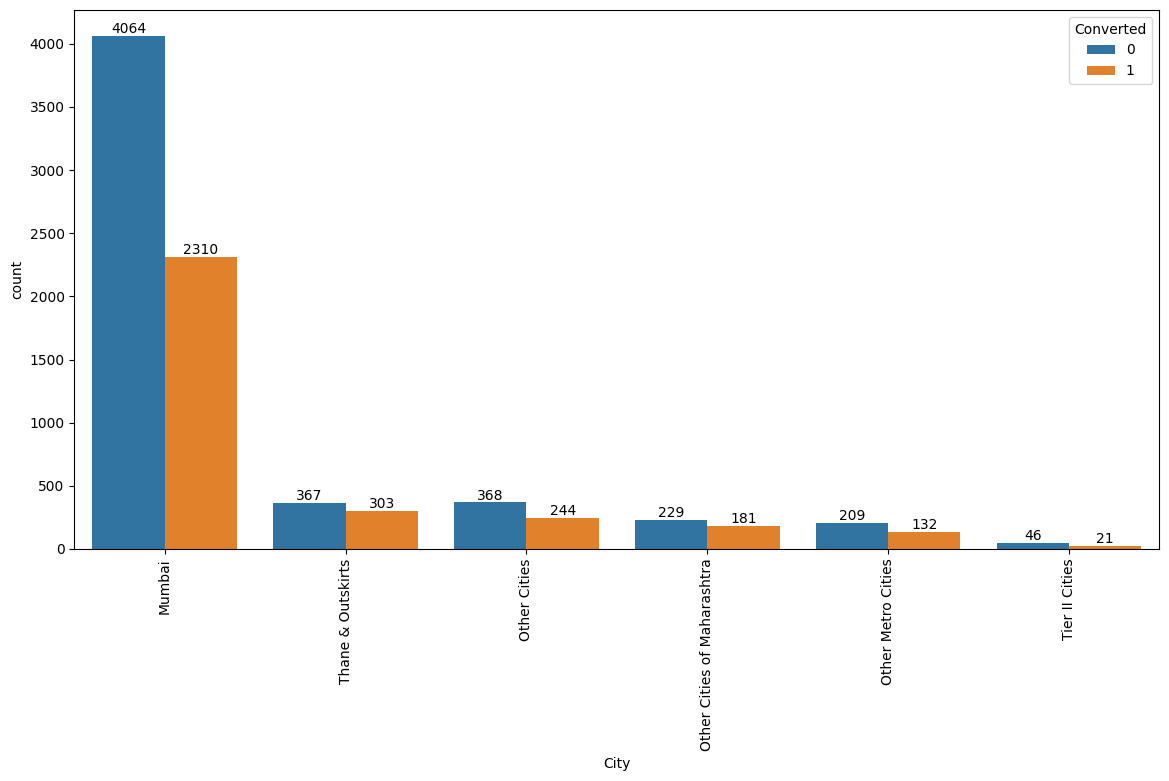

In [77]:
# Ploting graph of City W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["City"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

Even though Mumbai has most leads the convetion rate is less compaired to Other cities

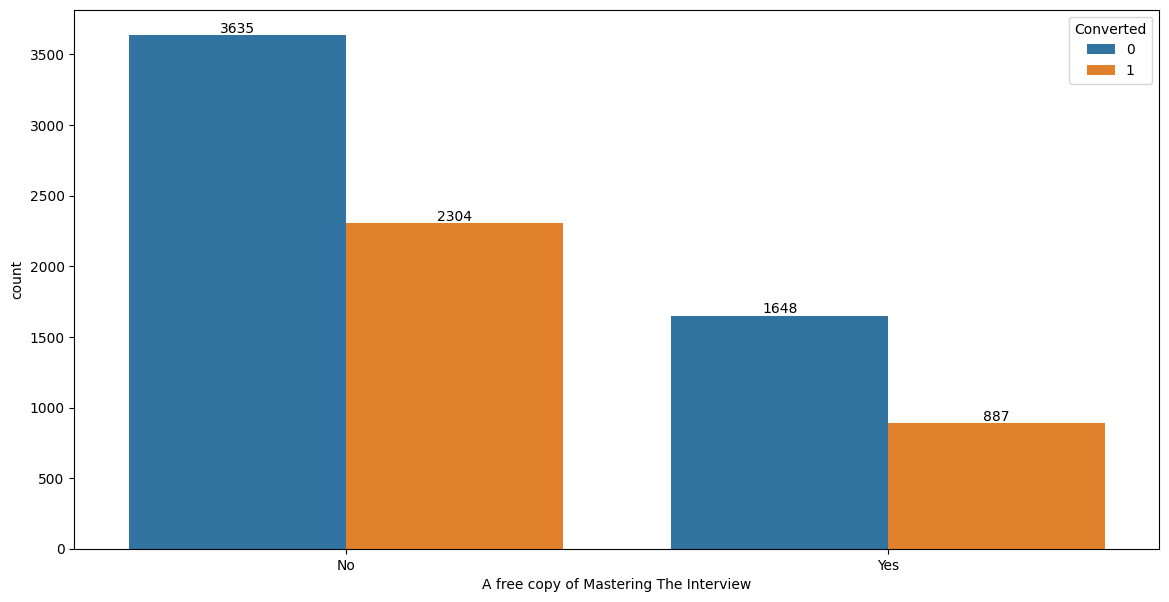

In [78]:
# Ploting graph of customer who wants a free copy of Mastering The Interview W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["A free copy of Mastering The Interview"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

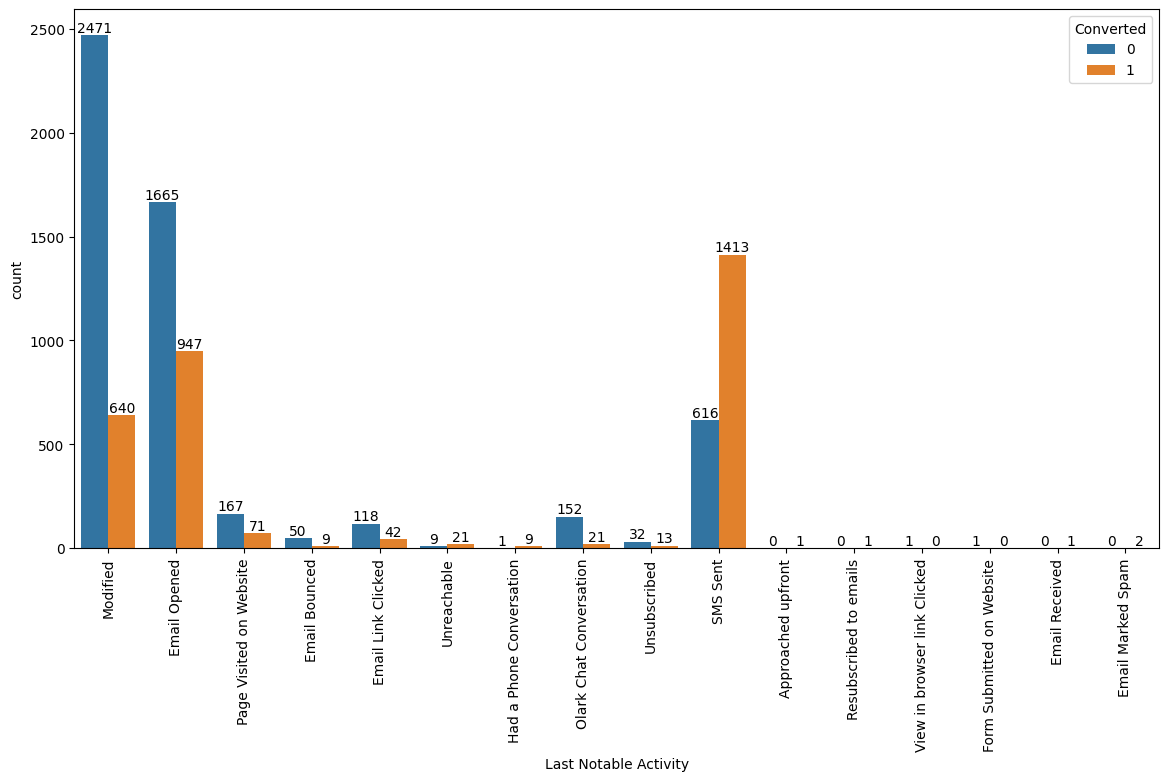

In [79]:
# Ploting graph of of Last Notable Activity W.R.T Lead Status.
plt.figure(figsize = (14,7))
ax = sns.countplot(data = lead_df, x=lead_df["Last Notable Activity"], hue = "Converted")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 90)
plt.show()

Last Notable activity gaves similar inference to Last Activity

Dropping columns that does not provide relevent information

In [80]:
lead_df= lead_df.drop(['Prospect ID','Do Not Call','Last Notable Activity' ],axis=1)
lead_df.shape

(8474, 13)

## Numeric Columns

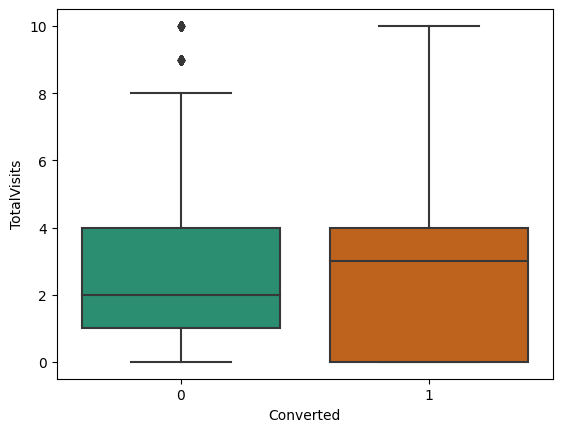

In [81]:
# plotting box plot for Total Visits.
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df ,palette='Dark2')
plt.show()

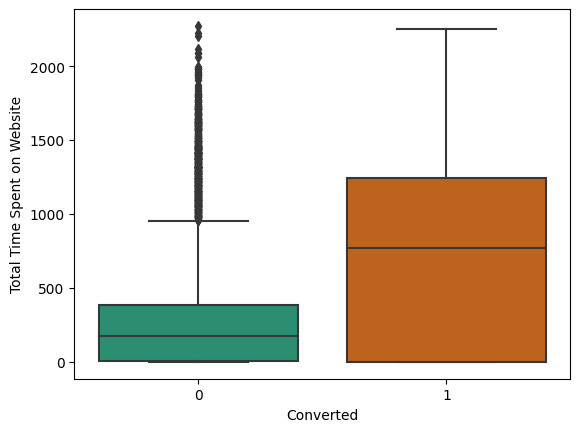

In [82]:
# plotting box plot for Total Time Spent on Website.
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df ,palette='Dark2')
plt.show()

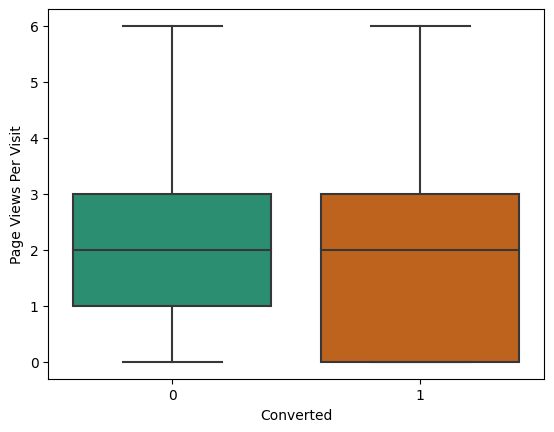

In [83]:
# plotting box plot for Page Views Per Visit.
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df ,palette='Dark2')
plt.show()

##### - As the no of visits increases the conversion rates
##### - Time spend on the site also increases the conversion rates

## Multivariate Analysis
Heat map

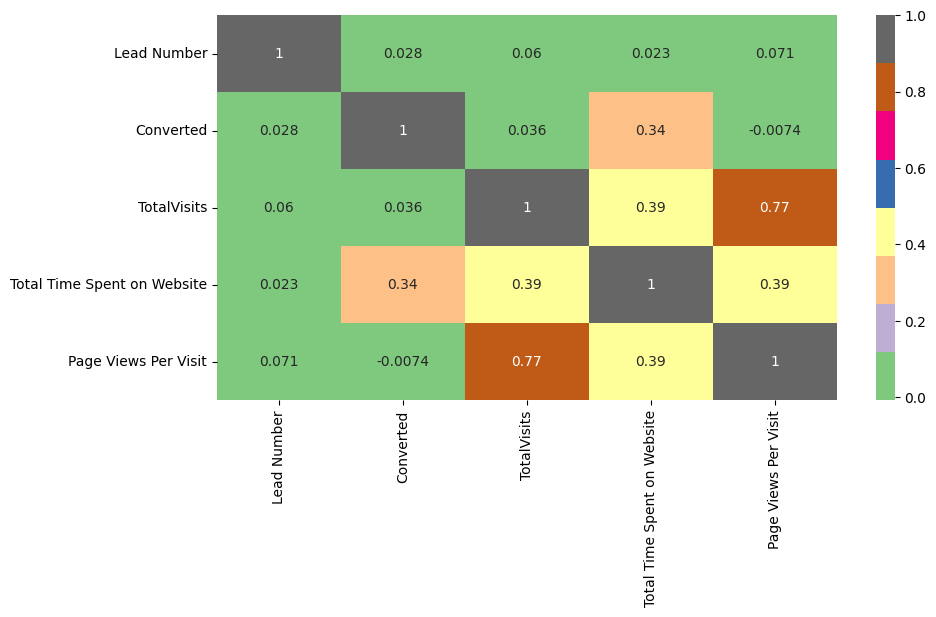

In [84]:
# To check the correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr(),cmap = "Accent", annot = True)
plt.show()

 We can see negavtive correlation between "Page Views Per Visit" and "converted" also Highest correlation between "Page Views Per Visit and "Total Visits"

### Recomendations after EDA

#### To improve the convertion rates

###### - Generate more leads from Lead Add Form.
###### - Generate more leads from reference.
###### - More Visits and Time Spent on Website are more likely to be converted.


# Model Buiding

In [85]:
# Changing Yes or No options to 1 or 0
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes': 1, 'No': 0})
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,UnKnown,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,UnKnown,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,UnKnown,Unemployed,Mumbai,0


In [86]:
# Creation of Dummy Variables and adding them
dummy1 = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City']],drop_first=True, dtype = int)
lead_df = pd.concat([lead_df, dummy1], axis=1)

In [87]:
# Dropping the columns for which dummies were created
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'City'], axis = 1)
lead_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UnKnown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [88]:
lead_df.shape

(8474, 74)

In [89]:
# Checking Data Type
print(lead_df.dtypes)

Lead Number                           int64
Do Not Email                          int64
Converted                             int64
TotalVisits                         float64
Total Time Spent on Website           int64
                                     ...   
City_Other Cities                     int64
City_Other Cities of Maharashtra      int64
City_Other Metro Cities               int64
City_Thane & Outskirts                int64
City_Tier II Cities                   int64
Length: 74, dtype: object


## Test Train Split


In [90]:
# Putting variable to X
X = lead_df.drop(['Lead Number','Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UnKnown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
# Putting variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [92]:
# Split the dataset as 70% | 30% for train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [93]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UnKnown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,...,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000
mean,0.077727,2.761423,467.060024,2.080678,0.300118,0.523183,0.067611,0.004047,0.279717,0.004047,...,0.001686,0.022930,0.299949,0.599562,0.074186,0.071826,0.049570,0.038948,0.077390,0.008430
std,0.267764,2.338238,541.787378,1.659527,0.458348,0.499504,0.251098,0.063489,0.448898,0.063489,...,0.041030,0.149694,0.458274,0.490029,0.262096,0.258221,0.217073,0.193487,0.267232,0.091436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,228.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4.000000,884.500000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UnKnown,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
4329,0,3.0,1.661198,0.554013,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5793,0,0.0,-0.862145,-1.253883,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
435,0,4.0,-0.343448,1.156645,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8958,0,4.0,0.751170,-0.048619,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4266,0,4.0,-0.310222,1.156645,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [95]:
# Checking the success rate
Lead_success_rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Lead_success_rate

37.65636063252301

### Model Building

In [96]:
# Logistic regression model
lm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5861
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 18 Aug 2023   Deviance:                   1.2416e+05
Time:                        18:58:07   Pearson chi2:                 6.07e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.125e+15   6.64e+07    3.2e+07      0.000    2.12e+15    2.12e+15
Do Not Email                                          -1.92e+14   4.72e+06  -4.07e+07      0.000   -1.92e+14   -1.92e+14
TotalVisits                                          -4.443e+13   6.37e+05  -6.97e+07      0.000   -4.44e+13   -4.44e+13
Total Time Spent on Website                           8.287e+14   1.03e+06   8.08e+08      0.000    8.29e+14    8.29e+14
Page Views Per Visit                                  5.155e+13   1.63e+06   3.16e+07      0.000    5.16e+13    5.16e+13
A free copy of Mastering The Interview               -1.688e+13   2.84e+06  -5.94e+06      0.000   -1.69e+13   -1.69e+13
Lead Origin_Landing Page Submission                  -9.186e+13   3.56e+06  -2.58e+07      0.000   -9.19e+13   -9.19e+13
Lead Origin_Lead Add Form                             2.001e+15   1.48e+07   1.35e+08      0.000       2e+15       2e+15
Lead Origin_Lead Import                              -5.204e+14   4.82e+07  -1.08e+07      0.000    -5.2e+14    -5.2e+14
Lead Source_Direct Traffic                            1.877e+15   4.16e+07   4.51e+07      0.000    1.88e+15    1.88e+15
Lead Source_Facebook                                   1.32e+15   6.36e+07   2.07e+07      0.000    1.32e+15    1.32e+15
Lead Source_Google                                    1.825e+15   4.15e+07    4.4e+07      0.000    1.83e+15    1.83e+15
Lead Source_Live Chat                                 5.678e+15   6.14e+07   9.25e+07      0.000    5.68e+15    5.68e+15
Lead Source_NC_EDM                                     5.88e+15    7.9e+07   7.45e+07      0.000    5.88e+15    5.88e+15
Lead Source_Olark Chat                                1.767e+15   4.17e+07   4.24e+07      0.000    1.77e+15    1.77e+15
Lead Source_Organic Search                            1.831e+15   4.16e+07    4.4e+07      0.000    1.83e+15    1.83e+15
Lead Source_Pay per Click Ads                          2.39e+15   7.91e+07   3.02e+07      0.000    2.39e+15    2.39e+15
Lead Source_Press_Release                              -14.8190    1.8e-07  -8.22e+07      0.000     -14.819     -14.819
Lead Source_Reference                                 1.602e+15   3.91e+07    4.1e+07      0.000     1.6e+15     1.6e+15
Lead Source_Referral Sites                            1.761e+15   4.23e+07   4.16e+07      0.000    1.76e+15    1.76e+15
Lead Source_Social Media                              5.874e+15   7.91e+07   7.43e+07      0.000    5.87e+15    5.87e+15
Lead Source_WeLearn                                   8.721e+14   7.91e+07    1.1e+07      0.000    8.72e+14    8.72e+14
Lead Source_Welingak Website                          2.15

In [97]:
# Running RFE with 15 variables as output
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [98]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False])

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 56),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 55),
 ('Lead Source_blog', False, 25),
 ('Lead Source_testone', False, 58),

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_UnKnown', 'What is your current occupation_Housewife',
       'What is your current occupation_UnKnown',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [101]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activi

## Model with StatsModels

### Model 1

In [102]:
X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lead = lm1.fit()
lead.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2372.1
Date:                Fri, 18 Aug 2023   Deviance:                       4744.2
Time:                        18:58:25   Pearson chi2:                 5.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1646      0.132     -1.243      0.214      -0.424       0.095
Do Not Email                                            -1.2627      0.200     -6.318      0.000      -1.654      -0.871
Total Time Spent on Website                              1.0625      0.042     25.355      0.000       0.980       1.145
Lead Origin_Landing Page Submission                     -1.0509      0.135     -7.766      0.000      -1.316      -0.786
Lead Origin_Lead Add Form                                2.9570      0.240     12.314      0.000       2.486       3.428
Lead Source_Olark Chat                                   1.1432      0.127      9.006      0.000       0.894       1.392
Lead Source_Welingak Website                             3.0591      1.045      2.927      0.003       1.011       5.107
Last Activity_Converted to Lead                         -1.0802      0.203     -5.328      0.000      -1.478      -0.683
Last Activity_Email Bounced                             -0.9520      0.407     -2.336      0.019      -1.751      -0.153
Last Activity_Form Submitted on Website                 -0.8597      0.332     -2.591      0.010      -1.510      -0.209
Last Activity_Olark Chat Conversation                   -1.6309      0.187     -8.744      0.000      -1.996      -1.265
Last Activity_SMS Sent                                   1.3385      0.080     16.809      0.000       1.182       1.495
Specialization_UnKnown                                  -0.9290      0.130     -7.151      0.000      -1.184      -0.674
What is your current occupation_Housewife               22.9753   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
What is your current occupation_UnKnown                 -1.1316      0.091    -12.442      0.000      -1.310      -0.953
What is your current occupation_Working Professional     2.1890      0.191     11.448      0.000       1.814       2.564
========================================================================================================================
"""

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_UnKnown,2.38
4,Lead Source_Olark Chat,2.14
0,Do Not Email,1.84
7,Last Activity_Email Bounced,1.78
2,Lead Origin_Landing Page Submission,1.76
10,Last Activity_SMS Sent,1.64
13,What is your current occupation_UnKnown,1.63
3,Lead Origin_Lead Add Form,1.59
9,Last Activity_Olark Chat Conversation,1.51
5,Lead Source_Welingak Website,1.34


#### The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife'

In [104]:
col = col.drop(["What is your current occupation_Housewife"])

In [105]:
# Getting the predicted values on the train set
y_train_pred = lead.predict(X_train_sm)
y_train_pred[:10]

4329    0.358444
5793    0.995521
435     0.170742
8958    0.397144
4266    0.228587
3766    0.044741
1377    0.467692
3834    0.291508
7558    0.011103
1913    0.615878
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3584442 , 0.99552118, 0.17074161, 0.39714422, 0.22858746,
       0.04474058, 0.46769178, 0.29150763, 0.01110292, 0.61587819])

In [107]:
y_train.values

array([1, 1, 0, ..., 0, 0, 0])

Creating a dataframe with the actual leads and the predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.358444,4329
1,1,0.995521,5793
2,0,0.170742,435
3,0,0.397144,8958
4,1,0.228587,4266


In [109]:
# Creating new column 'Converted_Prob' with 1 if leads_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.358444,4329,0
1,1,0.995521,5793,1
2,0,0.170742,435,0
3,0,0.397144,8958,0
4,1,0.228587,4266,0


In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3282  421]
 [ 667 1561]]


In [111]:
# The overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8165570730062384


### Model 2

In [112]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lead = lm2.fit()
lead.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2377.0
Date:                Fri, 18 Aug 2023   Deviance:                       4753.9
Time:                        19:09:02   Pearson chi2:                 5.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1572      0.132     -1.188      0.235      -0.417       0.102
Do Not Email                                            -1.2658      0.200     -6.335      0.000      -1.657      -0.874
Total Time Spent on Website                              1.0618      0.042     25.368      0.000       0.980       1.144
Lead Origin_Landing Page Submission                     -1.0479      0.135     -7.754      0.000      -1.313      -0.783
Lead Origin_Lead Add Form                                2.9598      0.240     12.333      0.000       2.489       3.430
Lead Source_Olark Chat                                   1.1414      0.127      8.996      0.000       0.893       1.390
Lead Source_Welingak Website                             3.0546      1.045      2.923      0.003       1.006       5.103
Last Activity_Converted to Lead                         -1.0873      0.203     -5.365      0.000      -1.485      -0.690
Last Activity_Email Bounced                             -0.9558      0.407     -2.346      0.019      -1.754      -0.157
Last Activity_Form Submitted on Website                 -0.8671      0.332     -2.614      0.009      -1.517      -0.217
Last Activity_Olark Chat Conversation                   -1.6340      0.186     -8.762      0.000      -1.999      -1.268
Last Activity_SMS Sent                                   1.3316      0.080     16.739      0.000       1.176       1.487
Specialization_UnKnown                                  -0.9317      0.130     -7.178      0.000      -1.186      -0.677
What is your current occupation_UnKnown                 -1.1353      0.091    -12.488      0.000      -1.313      -0.957
What is your current occupation_Working Professional     2.1827      0.191     11.417      0.000       1.808       2.557
========================================================================================================================
"""

In [113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_UnKnown,2.38
4,Lead Source_Olark Chat,2.14
0,Do Not Email,1.84
7,Last Activity_Email Bounced,1.78
2,Lead Origin_Landing Page Submission,1.76
10,Last Activity_SMS Sent,1.64
12,What is your current occupation_UnKnown,1.63
3,Lead Origin_Lead Add Form,1.58
9,Last Activity_Olark Chat Conversation,1.51
5,Lead Source_Welingak Website,1.34


In [114]:
# Getting the predicted values on the train set
y_train_pred = lead.predict(X_train_sm)
y_train_pred[:10]

4329    0.359730
5793    0.995510
435     0.172253
8958    0.399507
4266    0.227589
3766    0.045051
1377    0.469521
3834    0.292705
7558    0.011101
1913    0.615064
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35972983, 0.9955103 , 0.17225266, 0.39950691, 0.22758863,
       0.04505108, 0.46952133, 0.29270499, 0.01110147, 0.61506393])

In [116]:
y_train.values

array([1, 1, 0, ..., 0, 0, 0])

In [117]:
# Creating a dataframe with the actual leads and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.359730,4329
1,1,0.995510,5793
2,0,0.172253,435
3,0,0.399507,8958
4,1,0.227589,4266


In [118]:
# Creating new column 'Converted_Prob' with 1 if leads_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.359730,4329,0
1,1,0.995510,5793,1
2,0,0.172253,435,0
3,0,0.399507,8958,0
4,1,0.227589,4266,0


In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3282  421]
 [ 669 1559]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8162198617433822


Here we got all the p-value are under 0.05 and VIF is also under 5
It can take as a Final Model

### Model Evaluation

In [123]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6997307001795332

In [125]:
# Calculating specificity
TN / float(TN+FP)

0.8863083985957332

In [126]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.1136916014042668


In [127]:
# positive predictive value
print (TP / float(TP+FP))

0.7873737373737374


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8306757782839788


With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 88%.

### Plotting the ROC Curve

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

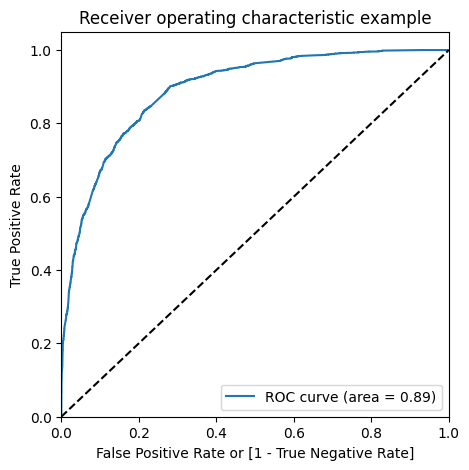

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding the optimal Point

In [131]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.359730,4329,0,1,1,1,1,0,0,0,0,0,0
1,1,0.995510,5793,1,1,1,1,1,1,1,1,1,1,1
2,0,0.172253,435,0,1,1,0,0,0,0,0,0,0,0
3,0,0.399507,8958,0,1,1,1,1,0,0,0,0,0,0
4,1,0.227589,4266,0,1,1,1,0,0,0,0,0,0,0


In [132]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375653  1.000000  0.000000
0.1   0.1  0.620806  0.979354  0.405077
0.2   0.2  0.764627  0.918761  0.671888
0.3   0.3  0.797842  0.847846  0.767756
0.4   0.4  0.813185  0.771993  0.837969
0.5   0.5  0.816220  0.699731  0.886308
0.6   0.6  0.805766  0.624776  0.914664
0.7   0.7  0.788400  0.520197  0.949770
0.8   0.8  0.764964  0.423698  0.970294
0.9   0.9  0.719777  0.275135  0.987308


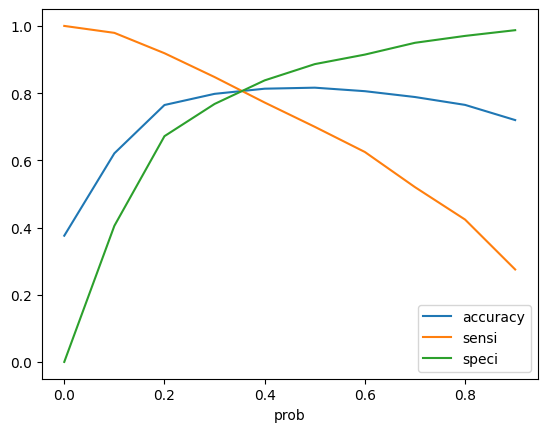

In [133]:
# Ploting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.359730,4329,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.995510,5793,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.172253,435,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.399507,8958,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.227589,4266,0,1,1,1,0,0,0,0,0,0,0,0


In [140]:
# The overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8093070308548306

In [141]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3039,  664],
       [ 467, 1761]])

In [142]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# The sensitivity of our logistic regression model
TP / float(TP+FN)

0.7903949730700179

In [144]:
# Calculating specificity
TN / float(TN+FP)

0.8206859303267621

In [145]:
# Calculating false postive rate -
print(FP/ float(TN+FP))

0.1793140696732379


In [146]:
# Positive predictive value
print (TP / float(TP+FP))

0.7261855670103092


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8667997718197376


With the cut off as 0.37 we have around 81% accuracy, sensitivity of around 79% and specificity of around 82%.

### Precision and Recall

In [148]:
# the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3282,  421],
       [ 669, 1559]])

In [149]:
# Precision
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7873737373737374

In [150]:
# Recall
# TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6997307001795332

In [151]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7873737373737374

In [152]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6997307001795332

In [153]:
# Precision and recall tradeoff

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 5926    0
 5927    0
 5928    0
 5929    0
 5930    0
 Name: Converted, Length: 5931, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 5926    1
 5927    0
 5928    0
 5929    0
 5930    0
 Name: predicted, Length: 5931, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

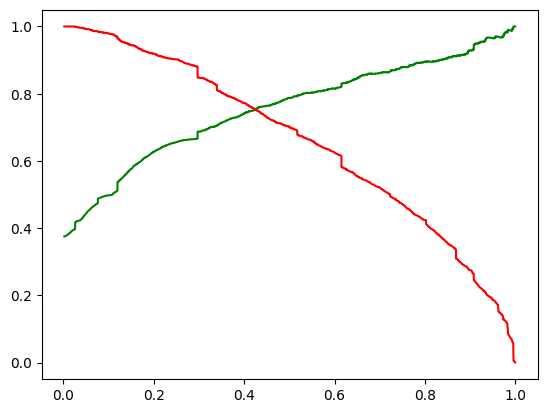

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the test set

In [156]:
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_UnKnown,What is your current occupation_UnKnown,What is your current occupation_Working Professional
7709,0,-0.581569,1,0,0,0,1,0,0,0,0,0,0,0
7125,0,0.415216,1,0,0,0,0,0,0,0,1,0,0,0
6403,0,1.428614,1,0,0,0,0,0,0,0,0,0,1,0
357,0,-0.797539,1,0,0,0,0,0,0,0,0,0,0,0
9082,1,0.022040,1,0,0,0,0,1,0,0,0,0,0,0


In [157]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [158]:
y_test_pred = lead.predict(X_test_sm)
y_test_pred[:10]

7709    0.051669
7125    0.638151
6403    0.305024
357     0.113862
9082    0.032194
1434    0.188169
3943    0.076075
1785    0.800633
8551    0.296730
557     0.119395
dtype: float64

In [160]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7709,0.051669
7125,0.638151
6403,0.305024
357,0.113862
9082,0.032194


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7709,0.051669
1,1,7125,0.638151
2,0,6403,0.305024
3,0,357,0.113862
4,0,9082,0.032194


In [165]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [166]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,7709,0,0.051669
1,7125,1,0.638151
2,6403,0,0.305024
3,357,0,0.113862
4,9082,0,0.032194


In [167]:
y_pred_final.tail()

,Prospect ID,Converted,Converted_Prob
2538,779,0,0.109775
2539,2783,1,0.820518
2540,1495,0,0.188851
2541,8353,0,0.119395
2542,7500,1,0.363640


In [168]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,7709,0,0.051669,0
1,7125,1,0.638151,1
2,6403,0,0.305024,0
3,357,0,0.113862,0
4,9082,0,0.032194,0


In [169]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    756
0    207
Name: final_predicted, dtype: int64

In [170]:
# checking the precentage of final_predicted conversions on test data

756/float(756+207)

0.7850467289719626

In [171]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final.final_predicted)

0.8187180495477782

In [172]:
# Confusion matix
confusion3 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final.final_predicted )
confusion3

array([[1326,  254],
       [ 207,  756]])

In [173]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7903949730700179

In [175]:
# calculate specificity
TN / float(TN+FP)

0.8206859303267621

### Hot leads:
A higher lead score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. Normally Hot leads have a score of 71 and above.For this analaysis we will consider a lead Score of above 75 as Hot Lead

In [176]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,7709,0,0.051669,0,5
1,7125,1,0.638151,1,64
2,6403,0,0.305024,0,31
3,357,0,0.113862,0,11
4,9082,0,0.032194,0,3


In [177]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"] >= 75]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
7,1785,0,0.800633,1,80
12,4353,1,0.839314,1,84
21,3414,0,0.807037,1,81
23,2918,1,0.868436,1,87
24,2594,1,0.996162,1,100
...,...,...,...,...,...
2528,7240,1,0.872381,1,87
2530,5021,1,0.857752,1,86
2533,7789,1,0.918593,1,92
2536,5721,0,0.792416,1,79


In [178]:
hot_leads['Lead_Score'].shape

(535,)

In [179]:
# Important Features from the final model
lead.params.sort_values(ascending=False)

Lead Source_Welingak Website                            3.054568
Lead Origin_Lead Add Form                               2.959826
What is your current occupation_Working Professional    2.182695
Last Activity_SMS Sent                                  1.331569
Lead Source_Olark Chat                                  1.141387
Total Time Spent on Website                             1.061764
const                                                  -0.157227
Last Activity_Form Submitted on Website                -0.867110
Specialization_UnKnown                                 -0.931686
Last Activity_Email Bounced                            -0.955798
Lead Origin_Landing Page Submission                    -1.047858
Last Activity_Converted to Lead                        -1.087278
What is your current occupation_UnKnown                -1.135252
Do Not Email                                           -1.265779
Last Activity_Olark Chat Conversation                  -1.633997
dtype: float64

## Final Observation

### Train Set:

#### Accuracy = 80.93%
#### Sensitivity = 79.04%
#### Specificity = 82.07%

### Test Set:

#### Accuracy = 81.87%
#### Sensitivity = 79.04%
#### Specificity = 82.07%

#### Conversion rate on the final predicted model is around 78.54%
#### There are 535 Hot Leads. They should be targeted as they have a high chance of getting converted.
#### We have determined the following features that have the highest positive coefﬁcients, and these features should be given priority in our marketing and sales efforts to increase lead conversion.
##### =>Lead Source_Welingak Website: 3.05
##### =>Lead Origin_Lead Add Form: 2.96
##### =>Current_occupation_Working Professional: 2.18